# Project
Description: I am an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue. As part of the project, I will need to gather and clean the data, prioritize hypotheses that may help boost our revenue and launch an A/B test and analyze the resulats later.

## Main Goal: 
### I need to prioritize these hypotheses, launch an A/B test, and analyze the results.

## Preparing The Data

In [1]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statistics
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import figure
import datetime
import numpy as np
import seaborn as sns
from functools import reduce
import math
from scipy import stats as st
from scipy import stats

import datetime as dt
import matplotlib.pyplot as plt

### Hypotheses 

In [2]:
hyp = pd.read_csv('/datasets/hypotheses_us.csv', sep=';', dtype={'Hypothesis': 'category'})

In [3]:
hyp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Hypothesis  9 non-null      category
 1   Reach       9 non-null      int64   
 2   Impact      9 non-null      int64   
 3   Confidence  9 non-null      int64   
 4   Effort      9 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 1.9 KB


In [4]:
hyp.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
hyp.duplicated().sum()

0

In [6]:
hyp.columns = map(str.lower, hyp.columns)

In [7]:
hyp.describe()

,reach,impact,confidence,effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [8]:
hyp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hypothesis  9 non-null      category
 1   reach       9 non-null      int64   
 2   impact      9 non-null      int64   
 3   confidence  9 non-null      int64   
 4   effort      9 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 1.9 KB


In [9]:
hyp.head(10)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Orders

In [10]:
orders = pd.read_csv('/datasets/orders_us.csv')

In [11]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
orders.duplicated().sum()

0

In [14]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [15]:
orders['date'] = pd.to_datetime(orders['date'], format="%Y.%m.%d")

In [16]:
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

After I have changed the data type of the columm and renamed the columns so they will be more suiatabe, I will make a new data without the problematic users that are being used in both groups.

In [17]:
id_both_groups = orders.groupby('visitor_id', as_index=False).agg({'group': 'nunique'})

In [18]:
id_both_groups.head()

,visitor_id,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [19]:
id_both_groups['group'].value_counts()

1    973
2     58
Name: group, dtype: int64

In [20]:
value_list = list(id_both_groups[id_both_groups['group']==2]['visitor_id'])

In [21]:
orders_new = orders[~orders['visitor_id'].isin(value_list)]

In [22]:
orders_new.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 97.2 KB


In [23]:
orders_new.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B
10,3649131742,879864040,2019-08-15,65.7,A


### Visits

In [24]:
visits = pd.read_csv('/datasets/visits_us.csv', parse_dates = ['date'])

In [25]:
visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


In [26]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [27]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [28]:
visits.duplicated().sum()

0

In [29]:
id_two_groups = visits.groupby('visits', as_index=False).agg({'group':'nunique'})

In [30]:
id_two_groups.head(20)

,visits,group
0,361,1
1,369,1
2,378,1
3,395,1
4,406,1
5,412,1
6,413,1
7,421,1
8,468,1
9,487,1


In [31]:
id_two_groups['group'].value_counts()

1    55
2     3
Name: group, dtype: int64

In [32]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [33]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


I found out there are 3 id's that fall into both groups but I have decided to leave it as is because 3 id's are too little to affect anyhow on our data.

## Part 1 : Prioritizing Hypotheses

### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

To get the ICE score, we need to multiply the Impact and Confidence and divide it with the Effort.

In [34]:
hyp['ICE'] = (hyp['impact'] * hyp['confidence']) / hyp['effort']

In [35]:
hyp = hyp.sort_values('ICE', ascending=False)

In [36]:
ICE = hyp[['hypothesis', 'ICE']]

In [37]:
print('Hypothesis by ICE:', ICE)

Hypothesis by ICE:                                           hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

To get the RICE score, we need to multiply the Reach, Impact and Confidence and divide it with the Effort.

In [38]:
hyp['RICE'] = (hyp['reach'] * hyp['impact'] * hyp['confidence']) / hyp['effort']

In [39]:
hyp = hyp.sort_values('RICE', ascending=False)

In [40]:
RICE = hyp[['hypothesis', 'RICE']]

In [41]:
print('Hypothesis by ICE:', RICE)

Hypothesis by ICE:                                           hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [42]:
hyp

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


The reach shows the level of coverage is measured by the number of people/events over a certain period of time. This factor is designed to estimate how many people each feature or project will affect over a certain period of time, and how many of your users will see such changes.

The entire order changes when using rice insted of ice, because we used more variabeles in our calculations.

We can see that the top 5 hypothesis stays the top 5 in both orders and bottom 5 stays the bottom 5, but the order is completly differnt , except hypothesis number 4 which is last place by both orders, so this one is really our last to check. For all other hypothesis the orders completely changes in top 5 and bottom 4.

We use the ICE model when you dont feel the need to differentiate between reach and impact, but in an online store we will need the newer calculation RICE which is taking in account both reach and impact.

For our online store we should use the RICE score.

## Part 2: A/B Test Analysis

### Graph cumulative revenue by group. Make conclusions and conjectures.

In [43]:
orders_new.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B
10,3649131742,879864040,2019-08-15,65.7,A


In [44]:
rev_group = pd.pivot_table(orders_new, index='date', columns='group', values='revenue', aggfunc='sum')

In [45]:
cumulative_rev_group = rev_group.cumsum()

In [46]:
cumulative_rev_group.head()

group,A,B
date,,
2019-08-01,2266.6,967.2
2019-08-02,3734.9,3535.3
2019-08-03,5550.1,4606.9
2019-08-04,6225.6,6138.5
2019-08-05,7623.6,7587.8


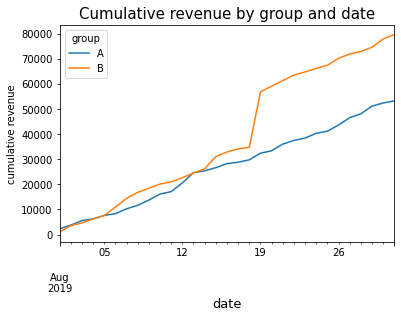

In [47]:
cumulative_rev_group.plot()
plt.title('Cumulative revenue by group and date', fontsize=15)
plt.xlabel('date', fontsize = 13)
plt.ylabel('cumulative revenue')
plt.show()

In [48]:
cumulative_rev_group = pd.DataFrame(cumulative_rev_group.to_records())

The cumulative revenue metrics of group B are higher then group A.
They follow almost the same stats for about 2 weeks(even though B is leading) and then group B opens with a big gap from group A and continues up.

### Graph cumulative average order size by group. Make conclusions and conjectures.

In [49]:
avg_order_size_group = pd.pivot_table(orders_new, index='date', columns='group', values='revenue', aggfunc = np.average)

In [50]:
cumulative_avg_order_size_group = avg_order_size_group

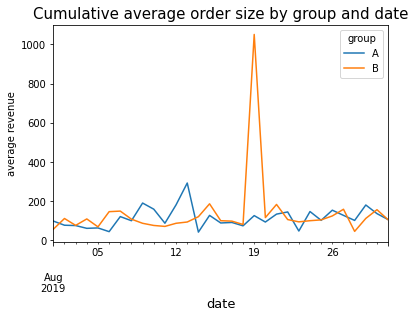

In [51]:
cumulative_avg_order_size_group.plot()
plt.title('Cumulative average order size by group and date', fontsize=15)
plt.xlabel('date', fontsize = 13)
plt.ylabel('average revenue')
plt.show()

In [52]:
orders_new.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [53]:
datesGroups = orders_new[['date', 'group']].drop_duplicates()

In [54]:
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [55]:
ordersAggregated = datesGroups.apply(lambda x: orders_new[np.logical_and(orders_new['date'] <= x['date'], orders_new['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transaction_id': pd.Series.nunique, 'visitor_id': pd.Series.nunique, 'revenue': 'sum'}),axis=1).sort_values(by=['date', 'group'])

In [56]:
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

In [57]:
ordersAggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [58]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}),axis=1).sort_values(by=['date', 'group'])

In [59]:
cumulativeRevenueA = ordersAggregated[ordersAggregated['group'] == 'A'][['date', 'revenue', 'orders']]

In [60]:
cumulativeRevenueB = ordersAggregated[ordersAggregated['group'] == 'B'][['date', 'revenue', 'orders']]

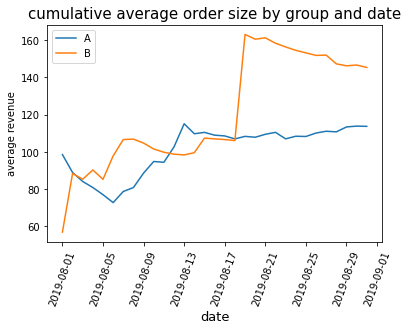

In [61]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('cumulative average order size by group and date', fontsize=15)
plt.xlabel('date', fontsize=13)
plt.ylabel('average revenue')
plt.xticks(rotation=70)
plt.show()

As we can see, the cumulative average order size changes over time for almost 3 weeks but after that, we have a big surge from the B group in the average revenue that grows drastically and gaps away from group A and then they start moving steadily when A goes upwards and B goes downwards.
We should continue watching what will happen in the future because they may reverse on each other.

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [62]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A','B'])

In [63]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


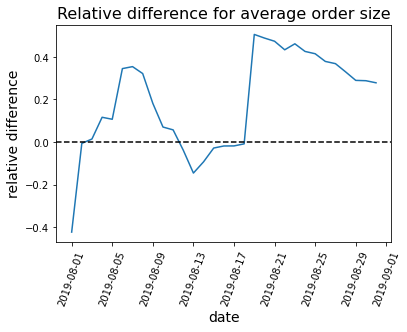

In [64]:
# plotting a relative difference graph for the average order sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Relative difference for average order size', fontdict={'size':16})
plt.xlabel("date", fontdict={'size':14})
plt.ylabel("relative difference", fontdict={'size':14})
plt.xticks(rotation=70)
# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

We can notice that we have 2 big surges in the graph. I think it may happen because of big orders that affect the average order size.

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [65]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [66]:
num_visits_group = pd.pivot_table(visits, index='date', columns='group', values='visits', aggfunc=np.sum)

In [67]:
num_visits_group = pd.DataFrame(num_visits_group.to_records())

In [68]:
num_visits_group.head()

,date,A,B
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [69]:
num_orders_group = pd.pivot_table(orders_new, index = 'date', columns='group', values='transaction_id', aggfunc = lambda x: len(x.unique()))

In [70]:
num_orders_group = pd.DataFrame(num_orders_group.to_records())

In [71]:
num_orders_group.head()

,date,A,B
0,2019-08-01,23,17
1,2019-08-02,19,23
2,2019-08-03,24,14
3,2019-08-04,11,14
4,2019-08-05,22,21


In [72]:
dates = num_visits_group['date']

In [73]:
conversionA = num_orders_group['A'] / num_visits_group['A']

In [74]:
print('Conversion rate for group A', conversionA.head())

Conversion rate for group A 0    0.031989
1    0.030695
2    0.047337
3    0.015342
4    0.029101
Name: A, dtype: float64


In [75]:
conversionB = num_orders_group['B'] / num_visits_group['B']

In [76]:
print('Conversion rate for group B', conversionB.head())

Conversion rate for group B 0    0.023843
1    0.039587
2    0.027505
3    0.018182
4    0.029703
Name: B, dtype: float64


In [77]:
conversionA_cumsum = conversionA.cumsum()

In [78]:
conversionB_cumsum = conversionB.cumsum()

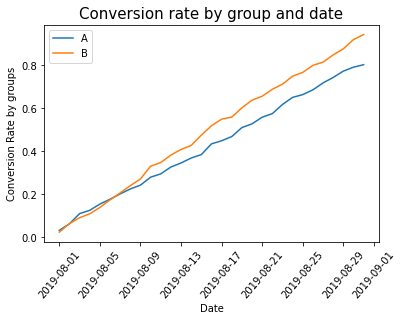

In [79]:
plt.plot(dates, conversionA_cumsum, label='A')
plt.plot(dates, conversionB_cumsum, label='B')
plt.legend()
plt.title('Conversion rate by group and date', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Conversion Rate by groups')
plt.xticks(rotation=50)
plt.show()

There isnt much of a difference.
Both groups are steadily going upward but group B has a hogher conversion rate that develops later on.

In [80]:
visitsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [81]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [82]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

In [83]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [84]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visits']

In [85]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [86]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

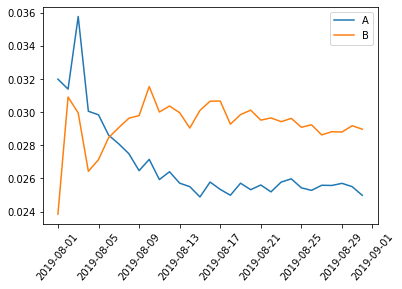

In [87]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()
plt.xticks(rotation = 50)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct results, and based on this graph it is easier to say that group B is showing better results.

In [88]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on = 'date', right_on='date', how='left', suffixes =['A', 'B'])

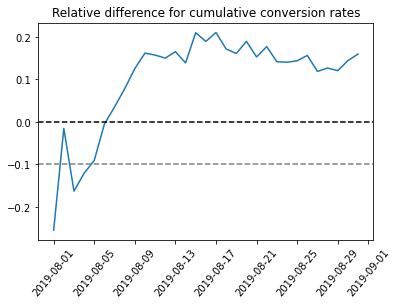

In [89]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Relative difference for cumulative conversion rates')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=50)
plt.show()

We can see that at the start of the test, group A was leading on group B but after a week, It changed as B started moving upwards and B started moving downwards. The conversion rate in group B went to a higher point.

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [90]:
ordersByUsers = orders_new.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})

In [91]:
ordersByUsers.columns = ['visitor_id', 'orders']

In [92]:
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


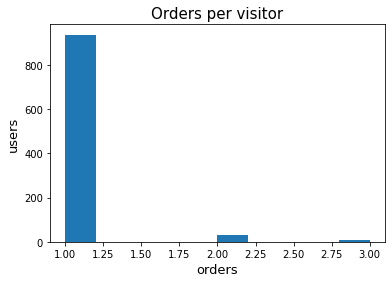

In [93]:
plt.hist(ordersByUsers['orders'])
plt.title('Orders per visitor', fontsize=15)
plt.xlabel('orders', fontsize=13)
plt.ylabel('users', fontsize=13)
plt.show()

After I have plotted the graph I noticed that most of our users have made only 1 purchase.
There are some that have made 2 or 3 purchases on our online store but they are drastically lower.
The marketing team should work on atracting our customers to make more purchases maybe with discounts of the second purcahse.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [94]:
ordersNumPercentile = np.percentile(ordersByUsers['orders'], [90, 95, 99])

In [95]:
print('Percentiles for: 90%, 95%, 99%:', ordersNumPercentile)

Percentiles for: 90%, 95%, 99%: [1. 1. 2.]


### Plot a scatter chart of order prices. Make conclusions and conjectures.

In [96]:
x_values = pd.Series(range(0, len(orders_new['revenue'])))

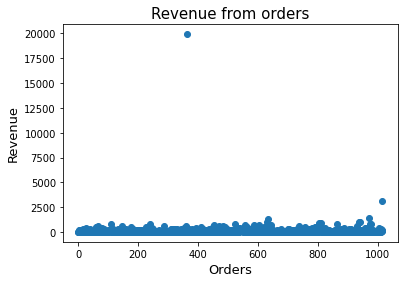

In [97]:
plt.scatter(x_values, orders_new['revenue'])
plt.title('Revenue from orders', fontsize=15)
plt.xlabel('Orders', fontsize=13)
plt.ylabel('Revenue', fontsize=13)
plt.show()

Almost all of our order prices are under the 2000 revenue.
There are only 2 outliers of 2500 and 20000 revenue that have been made. Maybe they are mistakes that we should check, or maybe it is true and there were big orders for companies and such.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great scaterplots. Additionally you can color two groups on this graph using other 'hue' parameter (https://seaborn.pydata.org/generated/seaborn.scatterplot.html) or different data sources (https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/)
    
And also you could check another scaterplot but without outliers. 

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [98]:
ordersPricePercentile = np.percentile(orders_new['revenue'], [90, 95, 99])

In [99]:
print('Percentiles for: 90%, 95%, 99%:', ordersPricePercentile)

Percentiles for: 90%, 95%, 99%: [280.8   414.275 830.3  ]


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You correctly identified 90, 95th and 99th percentiles. 

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box: 
    
    H0:
    H1:

H0: We reject the null hypothesis that there's not a statistically sagnificant difference in conversion between the groups.

H1: We can't reject the null hypothesis that there's not a statistically sagnificant difference in conversion between the groups.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2:</b>
    
Unfortunately, there is an issue in formulating null and alternative hypotheses.
A null hypothesis is a type of hypothesis used in statistics that proposes that there is no difference between certain characteristics of a population. An alternative hypothesis always contradicts the null one.

In [100]:
alpha=0.05

In [101]:
ordersByUsersA = orders_new[orders_new['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})

In [102]:
ordersByUsersB = orders_new[orders_new['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})

In [103]:
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transaction_id'])), name='transaction_id')],axis=0)


In [104]:
sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transaction_id'])), name='transaction_id')],axis=0)


In [105]:
print('Relative gain:', "{0:.2f}".format(sampleB.mean()/ sampleA.mean()-1))

Relative gain: 0.16


In [106]:
result= st.mannwhitneyu(sampleA, sampleB)[1]

In [107]:
print('p-value:' "{0:.2f}".format(result))

p-value:0.01


In [108]:
if (result < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

We reject the null hypothesis


### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.


H0: We reject the null hypotheses that the average order size differs between the groups.

H1: We cant reject the null hypotheses that the average order size differs between the groups.

In [109]:
print('significance_of_difference:', '{0:.5f}'.format(orders_new[orders_new['group']=='B']['revenue'].mean()/ orders_new[orders_new['group']=='A']['revenue'].mean()-1))


significance_of_difference: 0.27834


In [110]:
result= st.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]


In [111]:
print('P-Value:', "{0:.5f}".format(result))

P-Value: 0.86223


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
I can advise not to round the p-value, as it can be quite small and rounding can affect the results of the test.


In [112]:
if (result < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

We cant reject the null hypothesis


In [113]:
ordersA = orders_new.query('group == "A"')

In [114]:
print('Group A orders revenue mean:', '{:.2f}'.format(ordersA['revenue'].mean()))

Group A orders revenue mean: 113.70


In [115]:
ordersB = orders_new.query('group == "B"')

In [116]:
print('Group B orders revenue mean:', '{:.2f}'.format(ordersB['revenue'].mean()))

Group B orders revenue mean: 145.35


### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [117]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transaction_id'] > 1]['visitor_id'], ordersByUsersB[ordersByUsersB['transaction_id'] > 1]['visitor_id']], axis = 0)

In [118]:
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 414.275]['visitor_id']

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
It would be helpful not to hard code thresholds. This will help avoid mistakes in the future, especially if the project needs to be run on new data.

In [119]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [120]:
abnormalUsers.head(5)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64

In [121]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['transaction_id'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transaction_id'])),name='transaction_id')],axis=0)

In [122]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['transaction_id'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transaction_id'])),name='transaction_id')],axis=0)

In [123]:
print('Relative gain:', "{0:.2f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))  

Relative gain: 0.17


In [124]:
result= st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]     

In [125]:
print('P-Value:', "{0:.2f}".format(result))

P-Value: 0.02


In [126]:
if (result < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

We reject the null hypothesis


### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [127]:
significance_of_dif = orders_new[np.logical_and(orders_new['group']=='B', np.logical_not(orders_new['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/orders_new[np.logical_and(orders_new['group']=='A',np.logical_not(orders_new['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()-1

In [128]:
print('Significance of difference:', '{0:.2f}'. format(significance_of_dif))

Significance of difference: -0.03


In [129]:
result = st.mannwhitneyu(orders_new[np.logical_and(orders_new['group']=='A', np.logical_not(orders_new['visitor_id'].isin(abnormalUsers)))]['revenue'],orders_new[np.logical_and(orders_new['group']=='B',np.logical_not(orders_new['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]

In [130]:
print('p-value:', "{0:.2f}".format(result))

p-value: 0.77


In [131]:
if (result < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

We cant reject the null hypothesis


## Make a decision based on the test results. The possible decisions are: 
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

After we have done the research, ran our analysis and hypotheses and based our results on my plotted graphs, we conclude that group B has a higher and better cumulative average revenue and order size by group and date.

From our graphs we learned that after about a week to 2 weeks, group B gets ahead of group A even if group A was leading so we should continue watching and testing in the future to see if it remains.

Our outliers and anomalies are low but we have some that we should check them.

Most of our visitors made only 1 purchase at our store.

Most of our clients didnt purchase over 400 revenue.

For the difference in average order size between the groups using the filltered pvalue increased abit but this didnt change much, now it looks like the average order size of B is just abit smaller then for A if we leave aside our outliers.




<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
  
Can you please add overall conclusions with the decision regarding the test and also short interim conclusions after each test. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> 



Thank you for your work 🤝

You did a great research with correct intermediate conclusions, clean code and good visualization. You managed to correctly apply the frameworks for testing hypotheses, identify anomalies in the data and perform all the statistical tests.

I also fully agree with your test results. In this project, you can fall into the "peeking problem" and wait until there is a difference in metrics, but doing so is wrong. You can read more here: https://gopractice.io/blog/peeking-problem/#:~:text=by%20Oleg%20Yakubenkov-,Peeking%20problem%20%E2%80%93%20the%20fatal%20mistake%20in%20A%2FB%20testing%20and,A%2FB%20test%20is%20over
    


    
</div>